In [1]:
import matplotlib.pyplot as plt
from tifffile import imread
import os
import numpy as np
from scipy.signal import argrelextrema,find_peaks
from concurrent.futures.process import ProcessPoolExecutor
import cv2
import sys
sys.path.append('/scratch/programming/pipeline_utility/in_development/Will')
from cell_extractor.BorderFinder import BorderFinder
def find_border(max_con,shape):
    mask = np.zeros(shape)
    mask = cv2.fillPoly(mask, pts =[max_con.reshape(-1,1,2)], color=(255,255,255))
    kernel   = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (100,100))
    morphed  = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    kernel   = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50,50))
    eroded  = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel)
    return morphed-eroded

ModuleNotFoundError: No module named 'abakit.lib.Brain'

In [2]:
finder = BorderFinder(animal = 'DK41')
# finder.find_max_contour()
# finder.find_border_regions()

In [61]:
import pickle
pickle.dump(finder.borders,open(finder.BORDER_INFO,'wb'))

In [3]:
import sys
sys.path.append('/scratch/programming/pipeline_utility/in_development/Will')
from cell_extractor.CellDetectorBase import CellDetectorBase
animal = 'DK41'
base = CellDetectorBase(animal,round = 2)
detections = base.load_detections()
sure = detections[detections.predictions==2]
unsure = detections[detections.predictions==0]

In [ ]:
border_cell,sure = finder.find_border_cells(sure)
border_cell,unsure = finder.find_border_cells(unsure)

In [31]:
df = sure[sure.section==180]
scale_factor = 0.03125
data = np.array([df.row.to_list(),df.col.to_list()])*scale_factor

((2, 39), array([ 760.9375, 1494.    ]))

In [47]:
import pandas as pd
cells = sure
border_cell =[]
good_cell = []
for sectioni in cells.section.unique():
    df = cells[cells.section==sectioni]
    scale_factor = 0.03125
    data = np.array([df.row.to_list(),df.col.to_list()])*scale_factor
    border = finder.borders[sectioni]
    npoints = data.shape[1]
    on_border = []
    for i in range(npoints):
        point = data[:,i].astype(int)
        on_border.append(border[point[0],point[1]]>0)
    on_border = np.array(on_border)
    border_cell.append(df[on_border])
    good_cell.append(df[np.logical_not(on_border)])
border_cell = pd.concat(border_cell)
good_cell = pd.concat(good_cell)

In [49]:
len(good_cell),len(border_cell),len(cells)

(5058, 591, 5649)

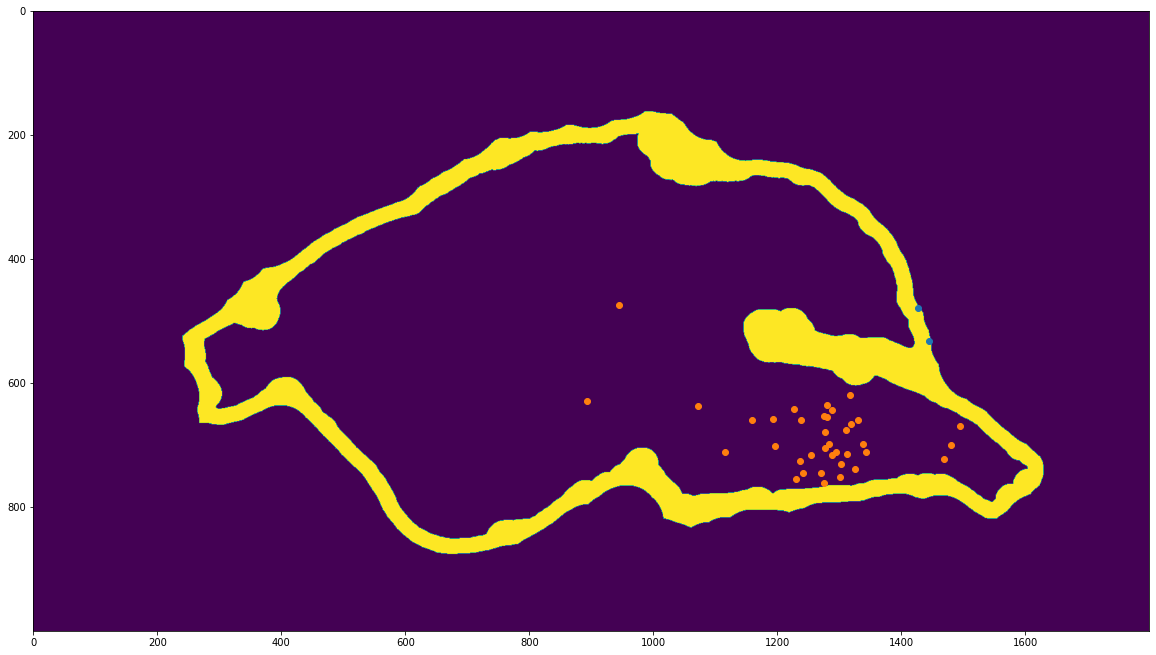

In [46]:
plt.figure(figsize=[20,20])
plt.imshow(finder.borders[180])
plt.scatter(data[1][on_border],data[0][on_border])
plt.scatter(data[1][on_border==False],data[0][on_border==False])

ValueError: num must be 1 <= num <= 400, not 401

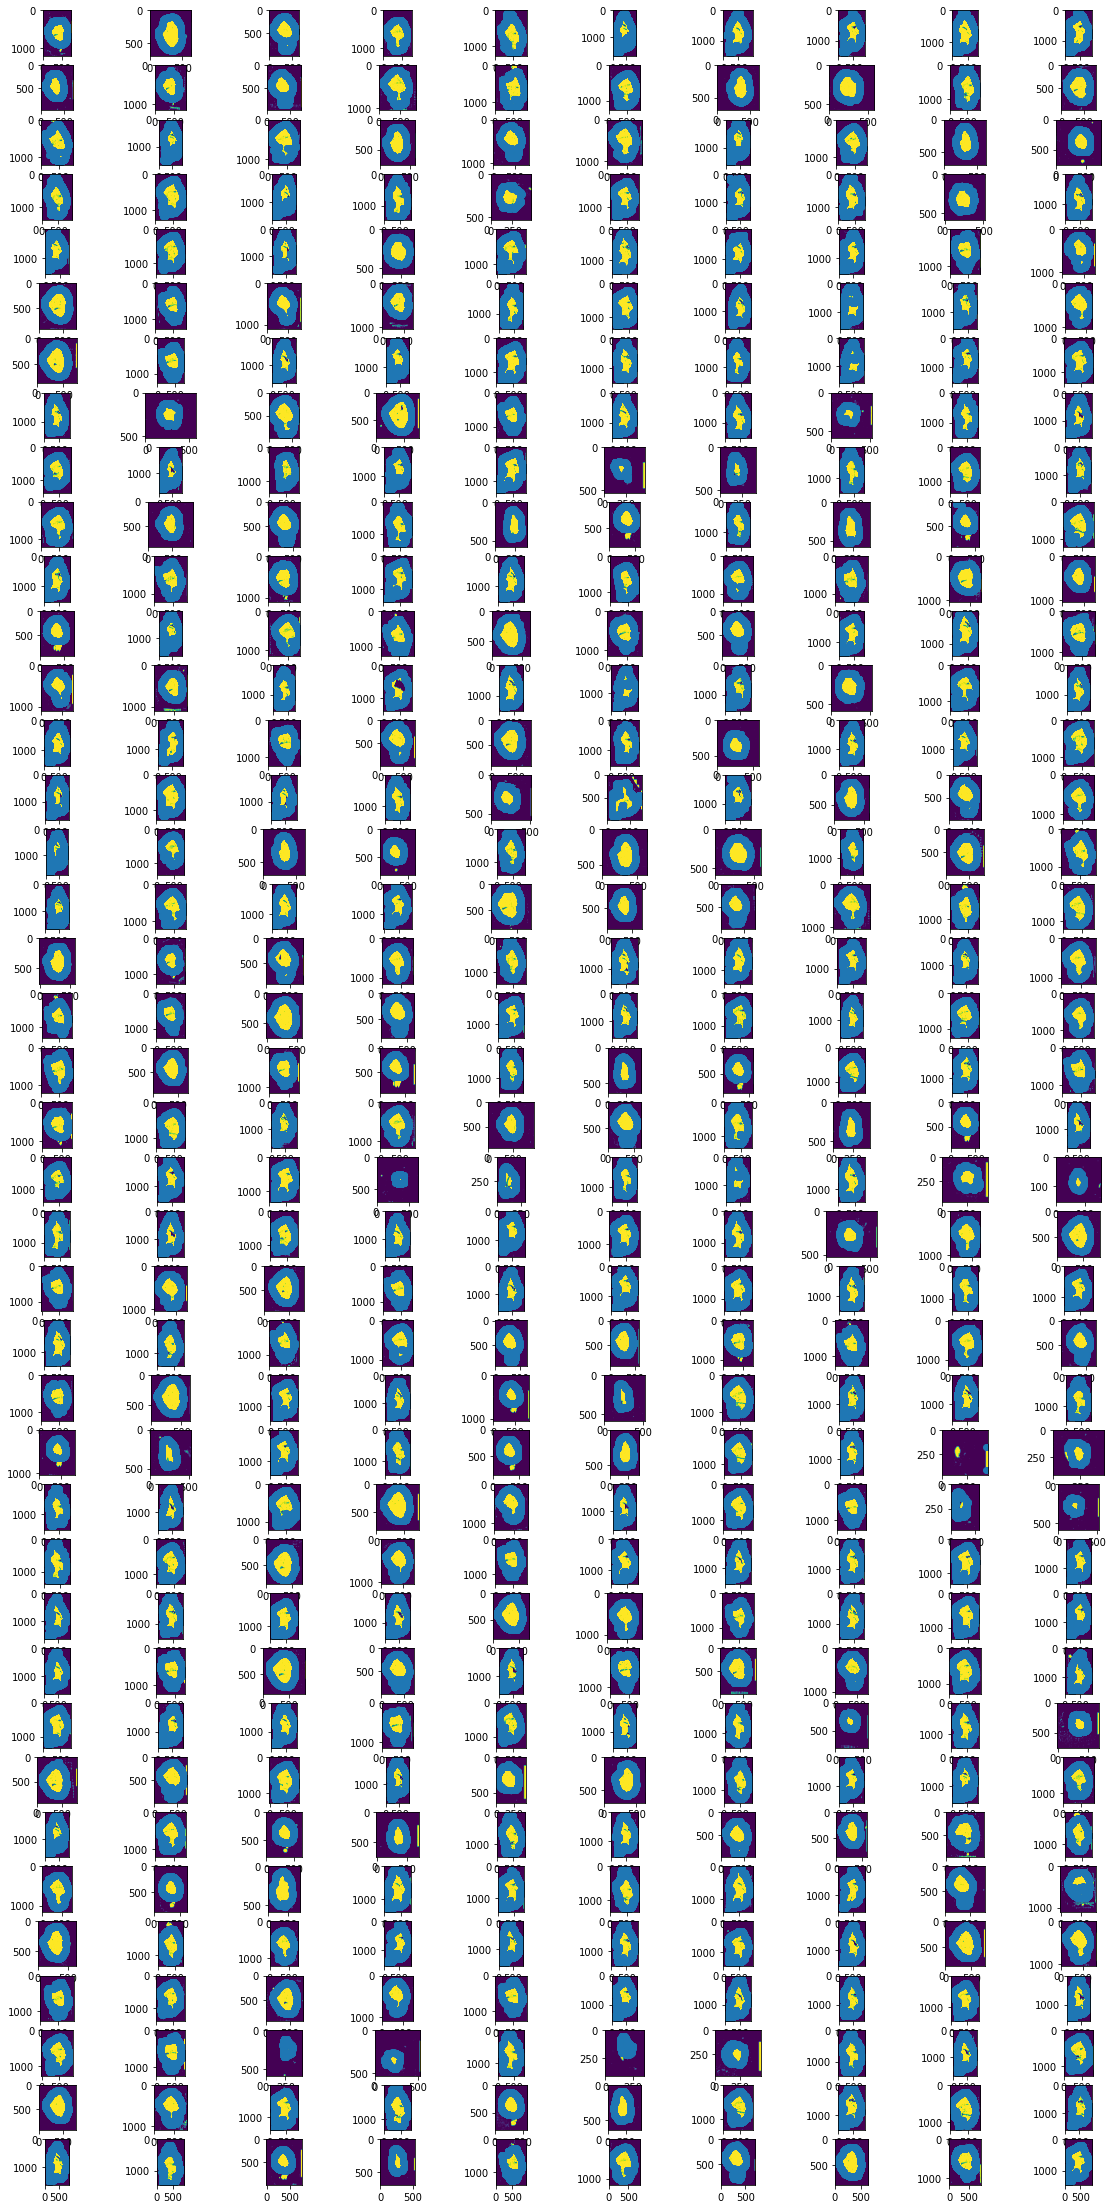

In [ ]:
plt.figure(figsize=[20,40])
i=1
bins = np.linspace(0,2000,100)
threshold = []
for file in files:
    img = imread(folder+file)
    plt.subplot(40,10,i)
    plt.imshow(imgs[i-1]>500)
    max_con = max_contours[i-1]
    plt.scatter(max_con[:,0],max_con[:,1])
    i+=1

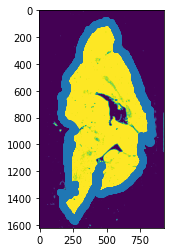

In [ ]:
plt.imshow(img>500)
plt.scatter(max_con[:,0],max_con[:,1])

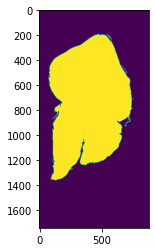

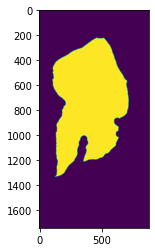

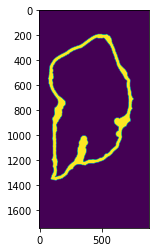

In [ ]:
# mask = img>500
mask = np.zeros(img.shape)
mask = cv2.fillPoly(mask, pts =[max_con.reshape(-1,1,2)], color=(255,255,255))
kernel   = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (100,100))
morphed  = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
kernel   = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50,50))
eroded  = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel)
plt.figure()
plt.imshow(mask)
plt.figure()
plt.imshow(eroded)
plt.figure()
plt.imshow(morphed-eroded)

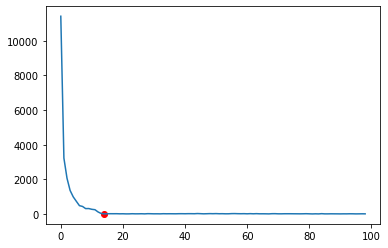

In [ ]:
bins = np.linspace(0,2000,100)
peaks = find_peaks(-line,prominence=10)[0][0]
line,bins = np.histogram(data,bins)
plt.plot(line)
plt.scatter(peaks,line[peaks],color='r')